 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csvpath = Path ('Resources/whale_returns.csv')

whale_returns_df = pd.read_csv(whale_csvpath, index_col = 'Date', parse_dates = True, infer_datetime_format = True)

In [3]:
whale_returns_df.sort_index(ascending = True, inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [5]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 2015-03-03 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csvpath = Path ('Resources/algo_returns.csv')

algo_returns_df = pd.read_csv(algo_returns_csvpath, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_returns_df.sort_index(ascending = True, inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [8]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2014-06-05 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1235 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv('Resources/sp500_history.csv', index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_df.sort_index(ascending = True, inplace = True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", " ")
sp500_df["Close"] = sp500_df["Close"].astype('float')

sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [12]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2012-10-02 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns = {'Close' : 'S&P500'})
sp500_daily_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios_returns = pd.concat([whale_returns_df, algo_returns_df ,sp500_daily_returns], axis = 'columns', join= 'inner' )
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

In [16]:
all_portfolios_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2015-03-03 to 2019-04-23
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1043 non-null   float64
 1   PAULSON & CO.INC.            1043 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1043 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1043 non-null   float64
 4   Algo 1                       1043 non-null   float64
 5   Algo 2                       1043 non-null   float64
 6   S&P500                       1043 non-null   float64
dtypes: float64(7)
memory usage: 65.2 KB


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

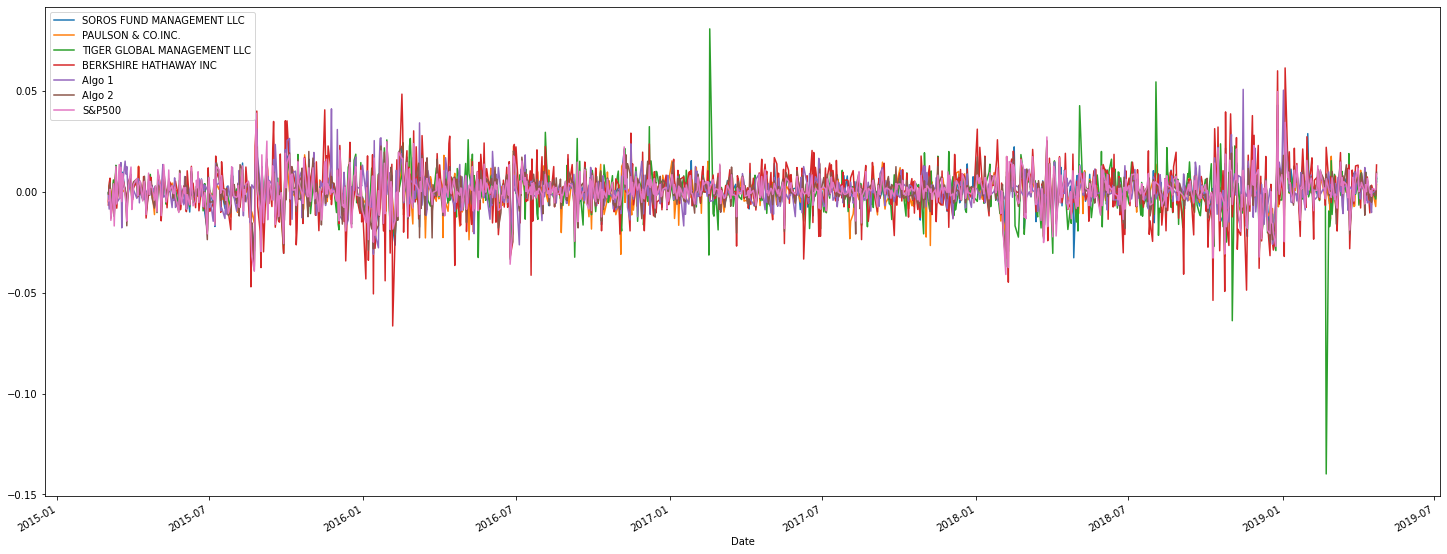

In [17]:
# Plot daily returns of all portfolios
all_portfolios_returns.plot(figsize = (25,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

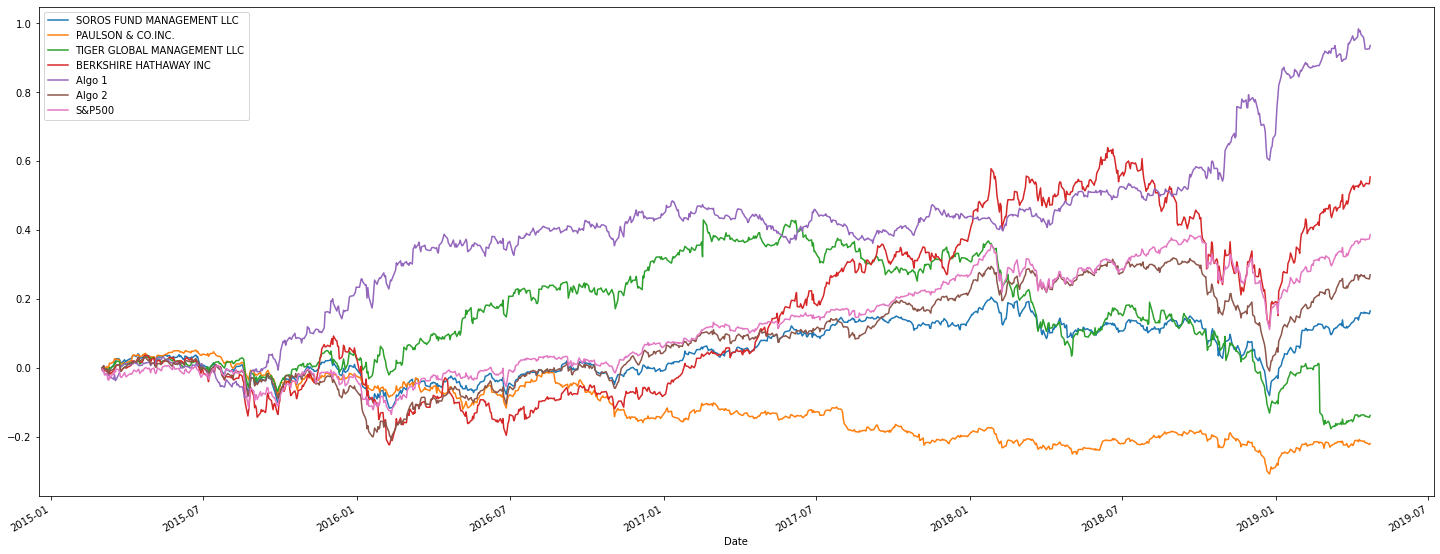

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+all_portfolios_returns).cumprod()-1

# Plot cumulative returns
cumulative_returns.plot(figsize = (25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

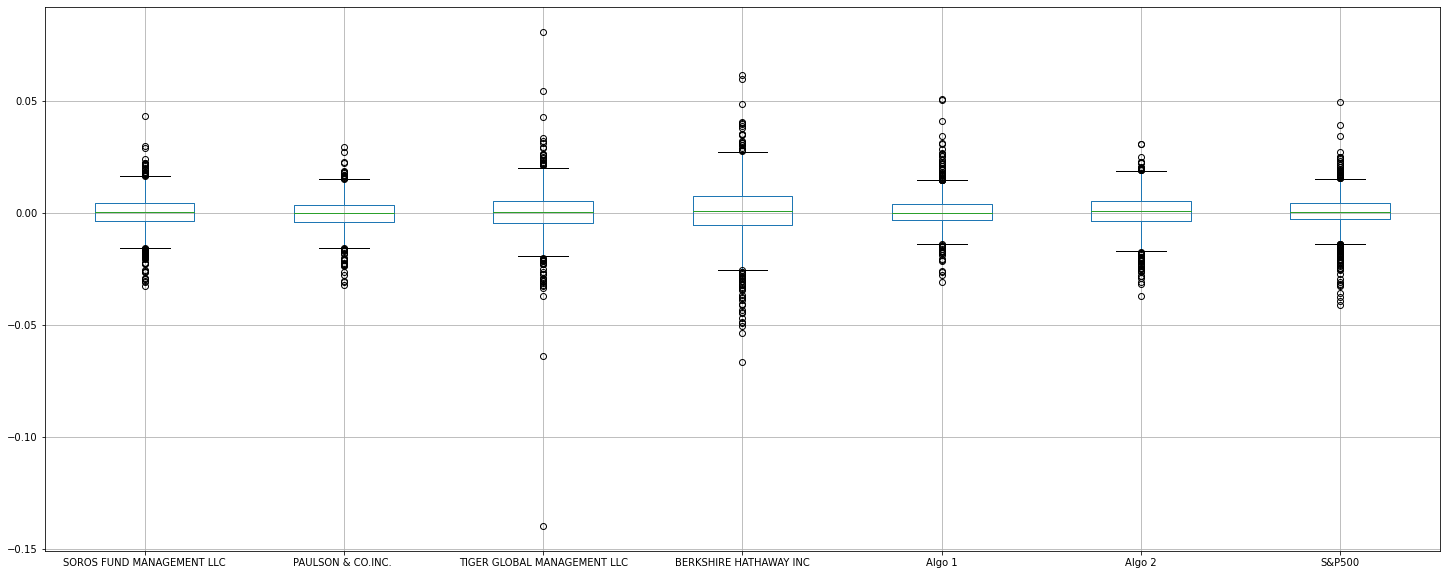

In [19]:
# Box plot to visually show risk
all_portfolios_returns.boxplot(figsize = (25,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_std_dev = all_portfolios_returns.std()
daily_std_dev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
daily_std_dev_SP500 = all_portfolios_returns['S&P500'].std()

# Determine which portfolios are riskier than the S&P 500
daily_std_dev.sort_values(ascending=False, inplace = True)
daily_std_dev

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500
riskier_than_SP500 = daily_std_dev[daily_std_dev > daily_std_dev_SP500 ]
riskier_than_SP500

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
dtype: float64

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev * np.sqrt(252)
annualized_std_dev

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = all_portfolios_returns.rolling(window=21).std()
rolling_std.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094
2019-04-23,0.004315,0.005695,0.004949,0.006602,0.005889,0.005582,0.004325


<AxesSubplot:xlabel='Date'>

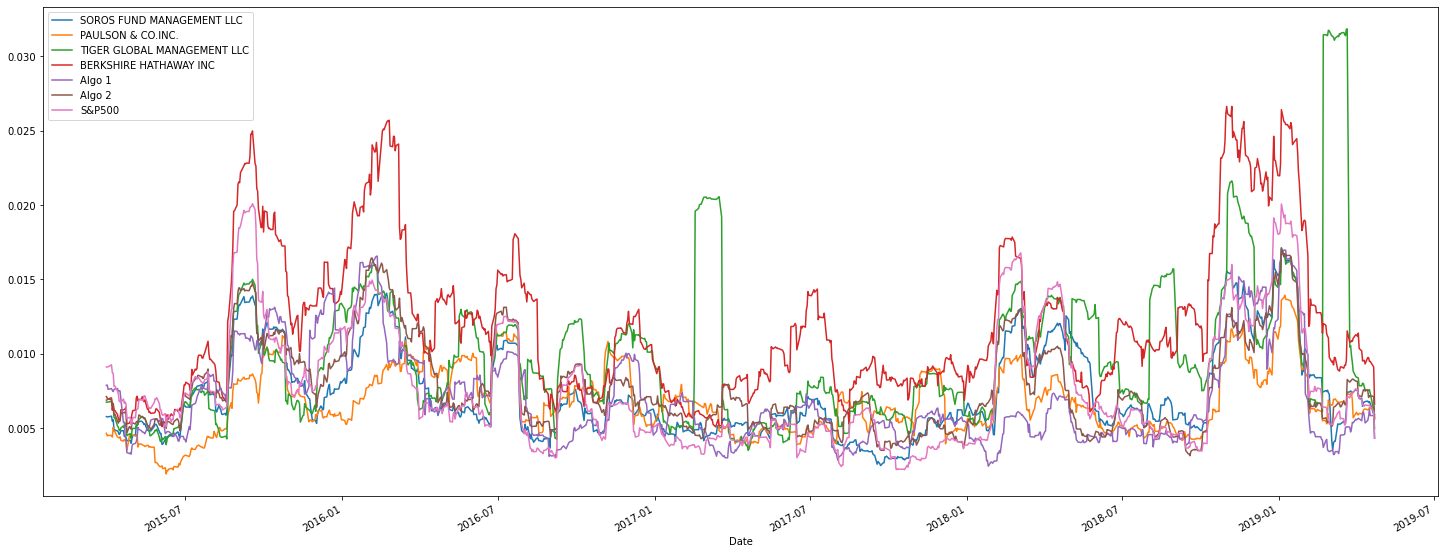

In [25]:
# Plot the rolling standard deviation
rolling_std.plot(figsize = (25,10))


### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = all_portfolios_returns.corr()
correlation.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494


<AxesSubplot:>

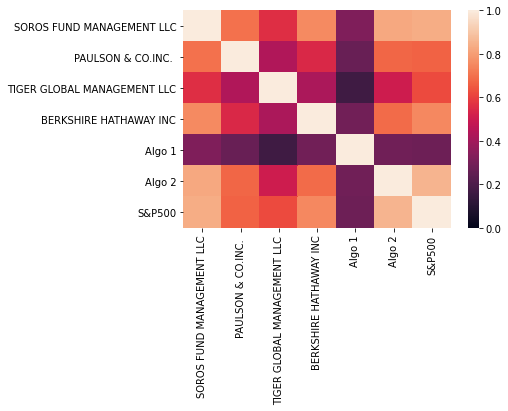

In [27]:
# Display de correlation matrix
import seaborn as sns
sns.heatmap (correlation, vmin=0, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
# Calculate covariance of a single portfolio
rolling_covariance = all_portfolios_returns['Algo 1'].rolling(window=60).cov(all_portfolios_returns['S&P500'])

# Calculate variance of S&P 500
rolling_variance = all_portfolios_returns['S&P500'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.025920
2019-04-17    0.072232
2019-04-18    0.069934
2019-04-22    0.069525
2019-04-23    0.084337
Length: 1043, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

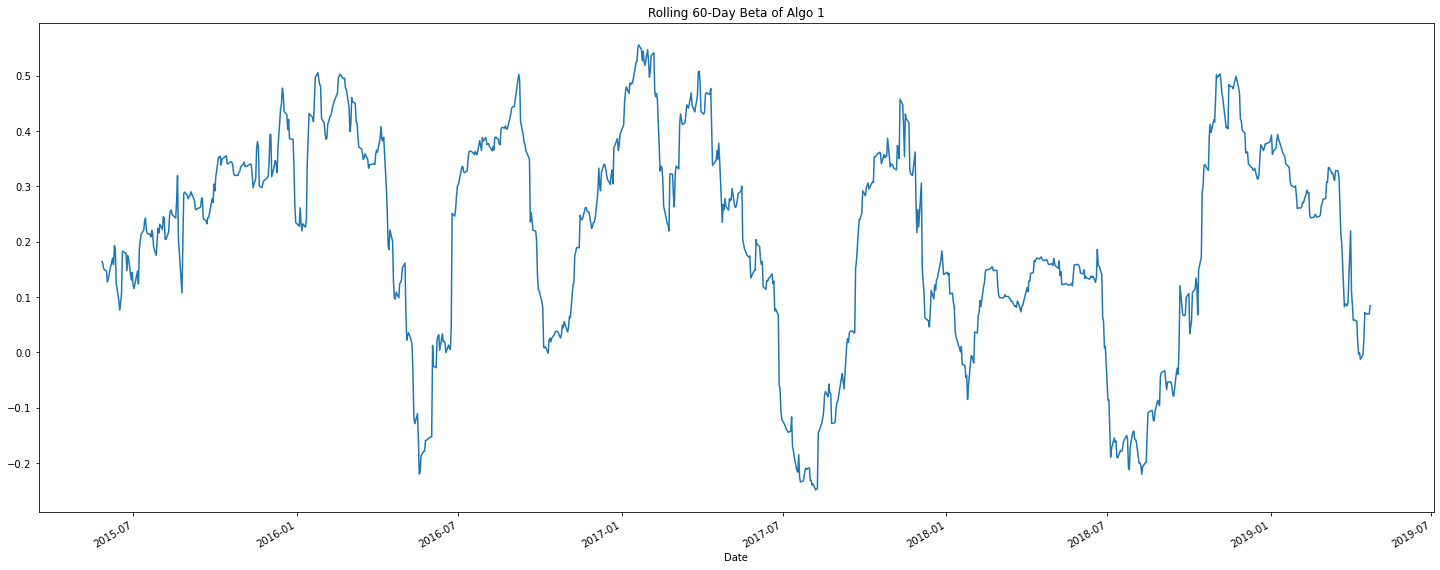

In [29]:
# Plot beta trend
rolling_beta.plot(title = 'Rolling 60-Day Beta of Algo 1', figsize=(25,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [30]:
# Use `ewm` to calculate the rolling window
ewm = all_portfolios_returns.ewm(halflife='21 days', times=all_portfolios_returns.index).mean()
ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000496,0.000724,-0.000524,-0.002121,-0.004415,-0.000903,-0.003436


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios

sharpe_ratios = (all_portfolios_returns.mean()*252) / (all_portfolios_returns.std()* np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

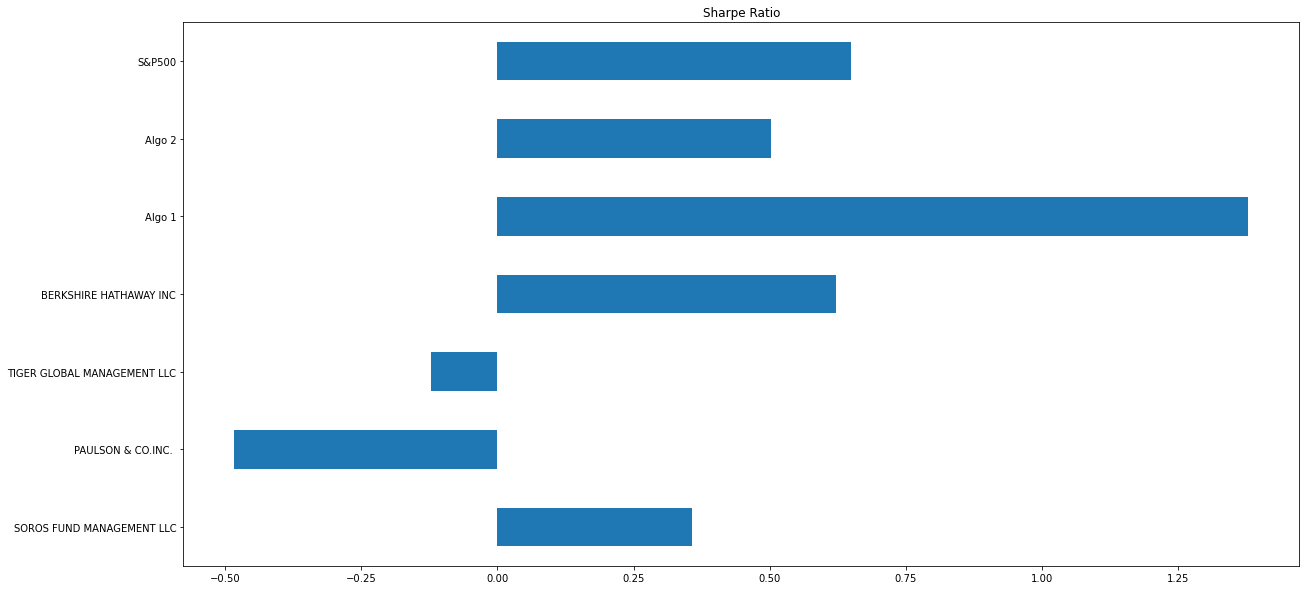

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='barh',figsize = (20,10), title = 'Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Only Algorithmic Strategie called 'Algo 1' outperforms all other portfolios. Algo 1 has the highest sharpe ratio. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [33]:
# Reading data from 1st stock
goog_csv = Path ("Resources/GoogleFinanceData - GOOG.csv")

goog_df = pd.read_csv(goog_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)

goog_df.sort_index(inplace=True)

goog_df.head()

,Close,Ticker
Date,,
2020-01-02 16:00:00,1367.37,GOOG
2020-01-03 16:00:00,1360.66,GOOG
2020-01-06 16:00:00,1394.21,GOOG
2020-01-07 16:00:00,1393.34,GOOG
2020-01-08 16:00:00,1404.32,GOOG


In [34]:
# Reading data from 2nd stock
aapl_df = pd.read_csv('Resources/GoogleFinanceData - AAPL.csv', index_col = "Date", parse_dates = True, infer_datetime_format=True)

aapl_df.sort_index(inplace=True)

aapl_df.head()

,Close,Ticker
Date,,
2020-01-02 16:00:00,75.09,AAPL
2020-01-03 16:00:00,74.36,AAPL
2020-01-06 16:00:00,74.95,AAPL
2020-01-07 16:00:00,74.60,AAPL
2020-01-08 16:00:00,75.80,AAPL


In [35]:
# Reading data from 3rd stock
cost_df = pd.read_csv('Resources/GoogleFinanceData - COST.csv', index_col='Date', parse_dates = True, infer_datetime_format = True)

cost_df.sort_index(inplace=True)

cost_df.head()

,Close,Ticker
Date,,
2020-01-02 16:00:00,291.49,COST
2020-01-03 16:00:00,291.73,COST
2020-01-06 16:00:00,291.81,COST
2020-01-07 16:00:00,291.35,COST
2020-01-08 16:00:00,294.69,COST


In [36]:
# Combine all stocks in a single DataFrame
all_stocks_df = pd.concat([goog_df, aapl_df, cost_df], axis = 'rows', join= 'inner')
all_stocks_df.head()

,Close,Ticker
Date,,
2020-01-02 16:00:00,1367.37,GOOG
2020-01-03 16:00:00,1360.66,GOOG
2020-01-06 16:00:00,1394.21,GOOG
2020-01-07 16:00:00,1393.34,GOOG
2020-01-08 16:00:00,1404.32,GOOG


In [37]:
# Reset Date index
all_stocks_df = all_stocks_df.reset_index()

In [38]:
# Reorganize portfolio data by having a column per symbol
all_stocks_df = all_stocks_df.pivot_table(values='Close', index='Date', columns ='Ticker')
all_stocks_df.head()

Ticker,AAPL,COST,GOOG
Date,,,
2020-01-02 16:00:00,75.09,291.49,1367.37
2020-01-03 16:00:00,74.36,291.73,1360.66
2020-01-06 16:00:00,74.95,291.81,1394.21
2020-01-07 16:00:00,74.60,291.35,1393.34
2020-01-08 16:00:00,75.80,294.69,1404.32


In [39]:
# Calculate daily returns
daily_returns = all_stocks_df.pct_change()
daily_returns.head()

Ticker,AAPL,COST,GOOG
Date,,,
2020-01-02 16:00:00,NaN,NaN,NaN
2020-01-03 16:00:00,-0.009722,0.000823,-0.004907
2020-01-06 16:00:00,0.007934,0.000274,0.024657
2020-01-07 16:00:00,-0.004670,-0.001576,-0.000624
2020-01-08 16:00:00,0.016086,0.011464,0.007880


In [40]:
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns.head()

Ticker,AAPL,COST,GOOG
Date,,,
2020-01-03 16:00:00,-0.009722,0.000823,-0.004907
2020-01-06 16:00:00,0.007934,0.000274,0.024657
2020-01-07 16:00:00,-0.004670,-0.001576,-0.000624
2020-01-08 16:00:00,0.016086,0.011464,0.007880
2020-01-09 16:00:00,0.021240,0.016051,0.011044


In [41]:
daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2020-01-03 16:00:00 to 2021-01-14 16:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    261 non-null    float64
 1   COST    261 non-null    float64
 2   GOOG    261 non-null    float64
dtypes: float64(3)
memory usage: 8.2 KB


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2020-01-03 16:00:00   -0.004602
2020-01-06 16:00:00    0.010955
2020-01-07 16:00:00   -0.002290
2020-01-08 16:00:00    0.011810
2020-01-09 16:00:00    0.016112
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([daily_returns, portfolio_returns], axis='columns', join = 'inner')

all_returns.head()


,AAPL,COST,GOOG,0
Date,,,,
2020-01-03 16:00:00,-0.009722,0.000823,-0.004907,-0.004602
2020-01-06 16:00:00,0.007934,0.000274,0.024657,0.010955
2020-01-07 16:00:00,-0.004670,-0.001576,-0.000624,-0.002290
2020-01-08 16:00:00,0.016086,0.011464,0.007880,0.011810
2020-01-09 16:00:00,0.021240,0.016051,0.011044,0.016112


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna()
all_returns

,AAPL,COST,GOOG,0
Date,,,,
2020-01-03 16:00:00,-0.009722,0.000823,-0.004907,-0.004602
2020-01-06 16:00:00,0.007934,0.000274,0.024657,0.010955
2020-01-07 16:00:00,-0.004670,-0.001576,-0.000624,-0.002290
2020-01-08 16:00:00,0.016086,0.011464,0.007880,0.011810
2020-01-09 16:00:00,0.021240,0.016051,0.011044,0.016112
...,...,...,...,...
2021-01-08 16:00:00,0.008631,0.005490,0.011168,0.008430
2021-01-11 16:00:00,-0.023249,-0.016030,-0.022405,-0.020561
2021-01-12 16:00:00,-0.001396,0.000522,-0.011417,-0.004097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
annualize_std = all_returns.std() * np.sqrt(252)
annualize_std.head()

AAPL    0.463452
COST    0.288567
GOOG    0.379260
0       0.337256
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation with 21-day window'}, xlabel='Date'>

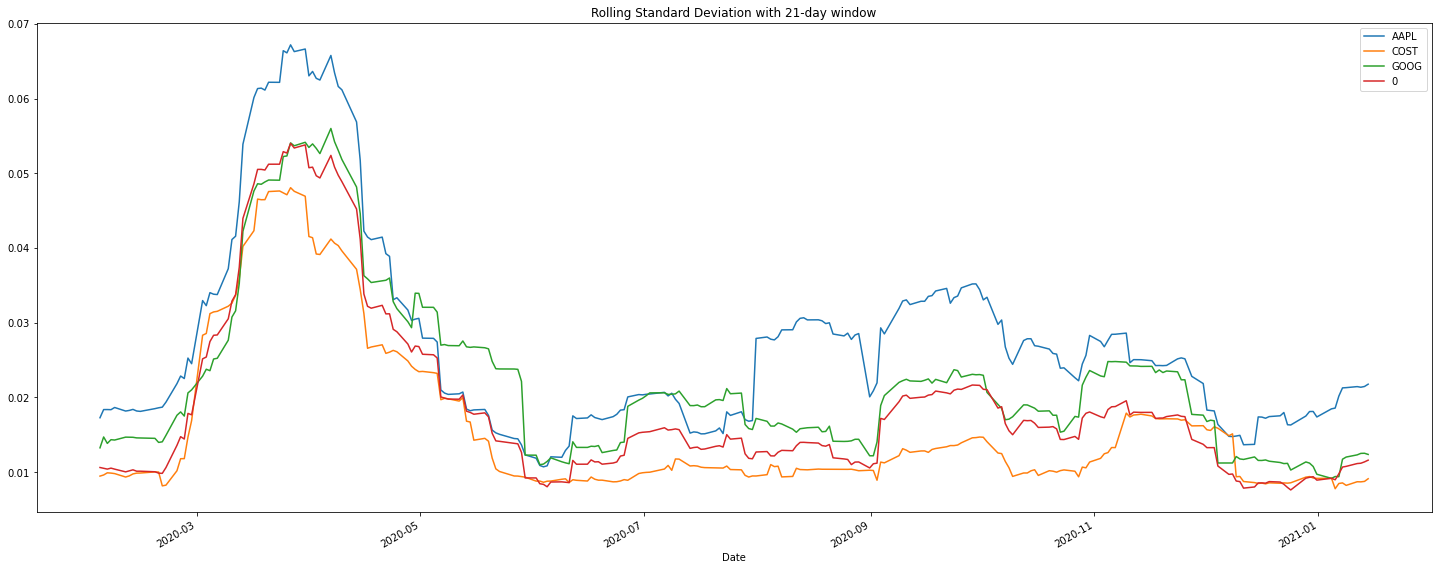

In [46]:
# Calculate rolling standard deviation
rolling_21 = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_21.plot(figsize=(25,10), title='Rolling Standard Deviation with 21-day window')

### Calculate and plot the correlation

<AxesSubplot:>

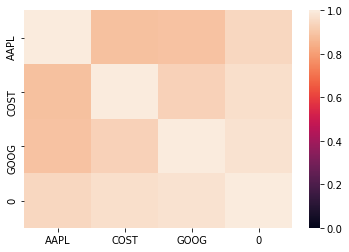

In [47]:
# Calculate and plot the correlation
correlation_n = rolling_21.corr()
sns.heatmap(correlation_n, vmin= 0, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 60 TSX

In [48]:
sp60tsx_df = pd.read_csv('Resources/GoogleFinanceData - S&P 60 TSX.csv', index_col='Date', parse_dates = True, infer_datetime_format = True)

sp60tsx_df.sort_index(inplace=True)

sp60tsx_df = sp60tsx_df.rename(columns = {'Close' : 'S&P60_TSX'})
sp60tsx_df = sp60tsx_df.drop(columns = 'Ticker')
sp60tsx_df.head()

,S&P60_TSX
Date,
2020-01-02 16:00:00,1018.24
2020-01-03 16:00:00,1015.65
2020-01-06 16:00:00,1018.26
2020-01-07 16:00:00,1021.30
2020-01-08 16:00:00,1022.96


In [49]:
sp60tsx_return = sp60tsx_df.pct_change().dropna()

In [50]:
sp60tsx_return.head()

,S&P60_TSX
Date,
2020-01-03 16:00:00,-0.002544
2020-01-06 16:00:00,0.002570
2020-01-07 16:00:00,0.002985
2020-01-08 16:00:00,0.001625
2020-01-09 16:00:00,0.003676


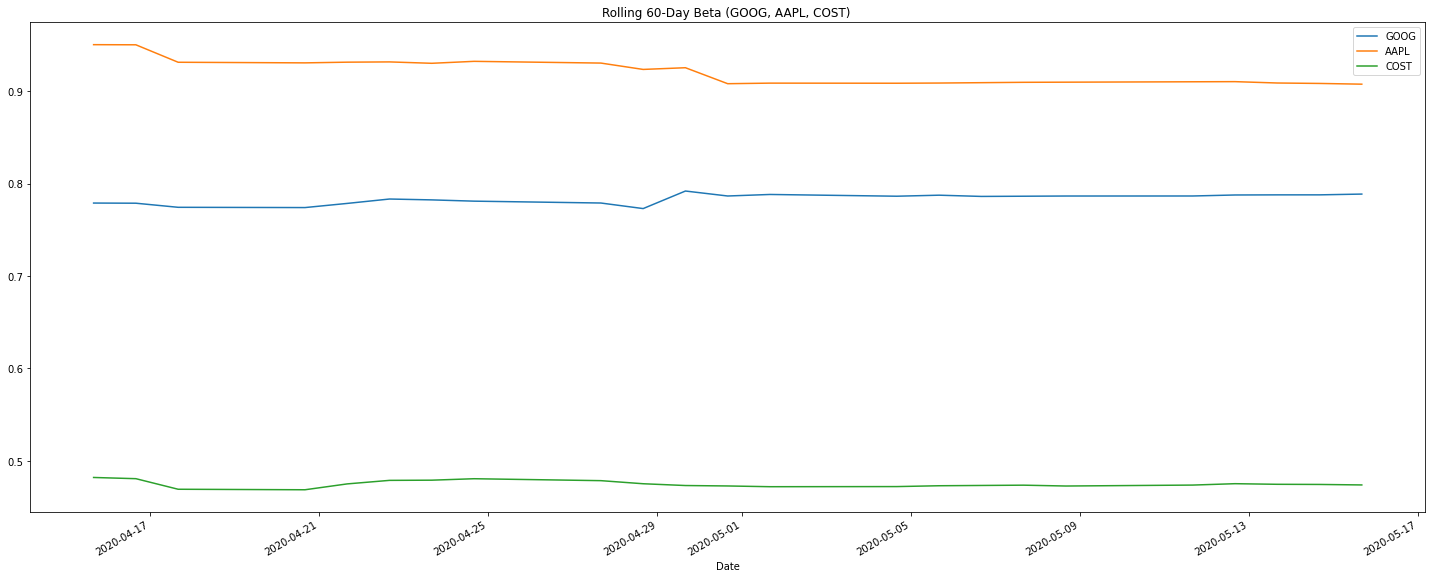

In [51]:
# Calculate and plot Beta
covariance_goog = all_returns['GOOG'].rolling(window=60).cov(sp60tsx_return['S&P60_TSX'])
covariance_aapl = all_returns['AAPL'].rolling(window=60).cov(sp60tsx_return['S&P60_TSX'])
covariance_cost = all_returns['COST'].rolling(window=60).cov(sp60tsx_return['S&P60_TSX'])

variance = sp60tsx_return['S&P60_TSX'].rolling(window=60).var()

beta_goog = covariance_goog / variance
beta_aapl = covariance_aapl / variance
beta_cost = covariance_cost / variance

ax= beta_goog.plot(figsize=(25,10), title= 'Rolling 60-Day Beta (GOOG, AAPL, COST) ')
beta_aapl.plot(ax=ax)
beta_cost.plot(ax=ax)
ax.legend(['GOOG', 'AAPL', 'COST'])


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / annualize_std

<AxesSubplot:>

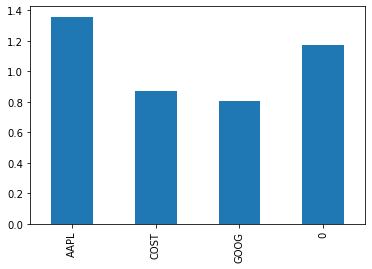

In [53]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

In [54]:
sharpe_ratio_avg = (all_returns.mean() * 252)
sharpe_ratio_avg

AAPL    0.629405
COST    0.251201
GOOG    0.304817
0       0.395141
dtype: float64

### How does your portfolio do?

All of them actually are good investments. Apple Inc. has higher sharpe ratio among all. Apple Inc. is the good investment but more votatile. Costco Wholesale Corporation is the smart investment and less votatile.  Google, LLC is also smart investment.